# Import modules

In [50]:
import pandas as pd

# our modules
import sys
sys.path.insert(0, '..')

# user defined
from clean import clean_data
from imbalance import balance_data
from evaluate import evaluate_model

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# pipeline
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.precision", 6)
pd.set_option("display.float_format", lambda x: "%.6f" % x)

In [3]:
RANDOM_STATE = 123

# Load data

In [4]:
data = pd.read_csv('/home/hristo/Documents/WBS_Data_Science/WBS_Predictive_Maintenance/data/ai4i2020.csv', index_col='UDI')

In [5]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.100000,308.600000,1551,42.800000,0,0,0,0,0,0,0
2,L47181,L,298.200000,308.700000,1408,46.300000,3,0,0,0,0,0,0
3,L47182,L,298.100000,308.500000,1498,49.400000,5,0,0,0,0,0,0
4,L47183,L,298.200000,308.600000,1433,39.500000,7,0,0,0,0,0,0
5,L47184,L,298.200000,308.700000,1408,40.000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,298.800000,308.400000,1604,29.500000,14,0,0,0,0,0,0
9997,H39410,H,298.900000,308.400000,1632,31.800000,17,0,0,0,0,0,0
9998,M24857,M,299.000000,308.600000,1645,33.400000,22,0,0,0,0,0,0


# Clean data

In [6]:
data_cl = clean_data(data, drop_type=True)
data_cl

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
UDI,,,,,,
1,298.100000,308.600000,1551,42.800000,0,0
2,298.200000,308.700000,1408,46.300000,3,0
3,298.100000,308.500000,1498,49.400000,5,0
4,298.200000,308.600000,1433,39.500000,7,0
5,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...
9996,298.800000,308.400000,1604,29.500000,14,0
9997,298.900000,308.400000,1632,31.800000,17,0
9998,299.000000,308.600000,1645,33.400000,22,0


# Prepare data

In [7]:
X = data_cl.copy()
y = X.pop('Machine failure')

# Split train and test

## without balancing

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)

## with balancing

In [9]:
data_bal, method = balance_data(X, y, 'ROS')
X_bl, y_bl = data_bal

In [10]:
print(X_bl.info())
print(y_bl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Rotational speed [rpm]   19322 non-null  int64  
 3   Torque [Nm]              19322 non-null  float64
 4   Tool wear [min]          19322 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 754.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 19322 entries, 0 to 19321
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
19322 non-null  int64
dtypes: int64(1)
memory usage: 151.1 KB
None


<Axes: >

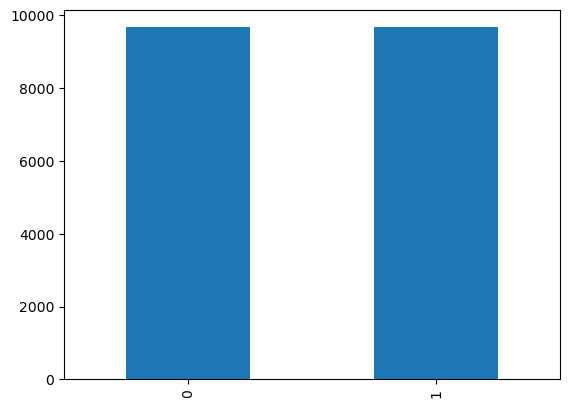

In [11]:
y_bl.value_counts().plot(kind='bar')

In [12]:
X_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      19322 non-null  float64
 1   Process temperature [K]  19322 non-null  float64
 2   Rotational speed [rpm]   19322 non-null  int64  
 3   Torque [Nm]              19322 non-null  float64
 4   Tool wear [min]          19322 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 754.9 KB


In [13]:
method

RandomOverSampler()

In [14]:
balance = True
if balance:
    X_train, X_test, y_train, y_test = train_test_split(X_bl, y_bl, train_size=0.8, random_state=RANDOM_STATE)

# Baseline model

## Pipeline

In [15]:
params = {}

In [16]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('estimator', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ('estimator', ExtraTreesClassifier())
])

In [17]:
# pipe.fit(X_train, y_train)

In [18]:
# y_pred = pipe.predict(X_test)

In [19]:
grid = GridSearchCV(
    pipe,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1
)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator', ExtraTreesClassifier())]),
             param_grid={}, scoring='accuracy', verbose=1)

In [21]:
best_score = grid.best_score_
print(best_score)

0.9981886233998216


In [22]:
best = grid.best_estimator_

In [23]:
y_pred = best.predict(X_test)

## Evaluation

In [24]:
accuracy, recall, precision, f1s, roc = evaluate_model(y_test, y_predictions=y_pred)

In [25]:
print(f"Accuracy: {accuracy:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"F1-Score: {f1s:.2%}")
print(f"ROC AUC score: {roc:.2%}")

Accuracy: 99.92%
Recall: 99.92%
Precision: 99.92%
F1-Score: 99.92%
ROC AUC score: 99.92%


<Axes: >

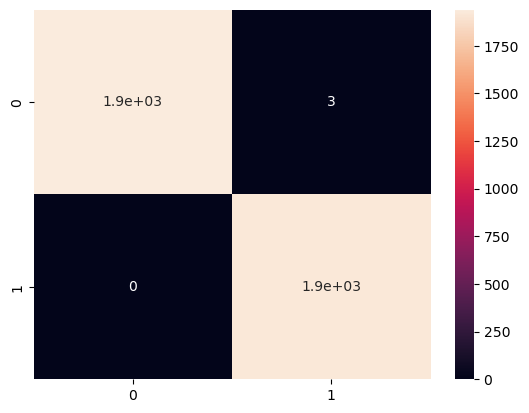

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(data=conf_matrix, annot=True)

In [27]:
conf_matrix

array([[1939,    3],
       [   0, 1923]])

# Grid search

In [28]:
params_pre = {
    "scaler__with_mean": [True, False],
    "scaler__with_std": [True, False]
}

In [29]:
estimators = {
    'DT': [DecisionTreeClassifier(random_state=RANDOM_STATE), {
        'estimator__max_depth': range(3, 6),
        'estimator__criterion': ['gini', 'entropy', 'log_loss']
    }],
    'RF': [RandomForestClassifier(random_state=RANDOM_STATE), {
        'estimator__n_estimators': range(30, 60, 10)
    }],
    'BC': [BaggingClassifier(SVC(), random_state=RANDOM_STATE), {
        'estimator__n_estimators': range(5, 16, 5)
    }],
    'ET': [ExtraTreesClassifier(), {
        'estimator__n_estimators': range(50, 200, 50),
        'estimator__criterion': ['gini', 'entropy', 'log_loss'],
        'estimator__max_depth': range(3, 6)
    }],
    'XG': [XGBClassifier(), {
        'estimator__n_estimators': range(30, 60, 10),
        'estimator__max_depth': range(3, 6),
        'estimator__learning_rate': [0.01, 0.05, 0.1]
    }]

}

In [30]:
def create_pipeline_and_cvparams(estimator):

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', estimator[1][0])
    ])

    cvparams = estimator[1][1]

    return pipe, cvparams

In [31]:
def run_model(xtrain, ytrain, xtest, ytest, params_pre, estimator, cv):

    pipe, params_est = create_pipeline_and_cvparams(estimator=estimator)

    if params_est:
        params = params_pre | params_est
    else:
        params = params_pre

    grid = GridSearchCV(pipe, params, cv=cv, verbose=1)
    grid.fit(xtrain, ytrain)

    grid_score       = grid.best_score_
    grid_best_params = grid.best_params_
    best_estimator   = grid.best_estimator_

    return best_estimator, grid_best_params, grid_score

In [32]:
total = {}
for estimator in estimators.items():
    model, best_params, score = run_model(
        xtrain=X_train,
        ytrain=y_train,
        xtest=X_test,
        ytest=y_test,
        params_pre=params_pre,
        estimator=estimator,
        cv=5
    )

    total[estimator[0]] = {
        'model': model,
        'best_params': best_params,
        'grid_score': score,
    }

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

# Lazy Osveh method

In [33]:
from lazypredict.Supervised import LazyClassifier

In [44]:
clf = LazyClassifier(random_state=RANDOM_STATE, predictions=True)

In [45]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [01:13<00:00,  2.54s/it]


In [46]:
models.apply(lambda x: 100*x, axis=1)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,99.922380,99.922760,99.922760,99.922381,52.124310
RandomForestClassifier,99.637775,99.639547,99.639547,99.637777,90.143251
BaggingClassifier,99.482536,99.485067,99.485067,99.482535,15.958953
XGBClassifier,99.430789,99.433574,99.433574,99.430787,1551.087141
DecisionTreeClassifier,99.249677,99.253347,99.253347,99.249662,4.835677
LGBMClassifier,99.197930,99.201854,99.201854,99.197910,2953.501463
ExtraTreeClassifier,98.861578,98.867147,98.867147,98.861494,2.126026
KNeighborsClassifier,97.878396,97.888774,97.888774,97.877662,7.505488
LabelPropagation,96.326003,96.343975,96.343975,96.321703,520.637012


In [47]:
model_dict = clf.provide_models(X_train, X_test, y_train, y_test)

In [48]:
model_dict['ExtraTreesClassifier']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', ExtraTreesClassifier(random_state=123))])

[Text(0, 0.5, 'Without Failure'), Text(0, 1.5, 'Failure')]

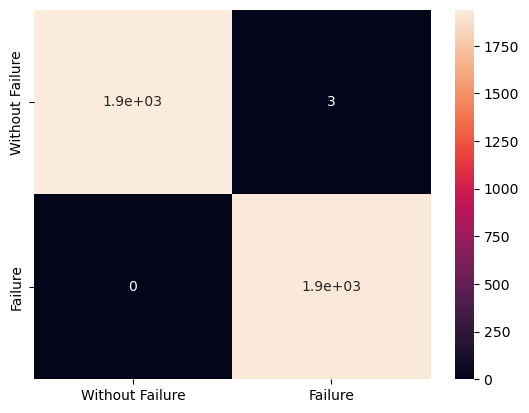

In [51]:
ax= plt.subplot()
conf_matrix = confusion_matrix(y_test, y_pred)
s = sns.heatmap(data=conf_matrix, annot=True, ax=ax)
#s.set(xlabel='X-Axis', ylabel='Y-Axis')
ax.xaxis.set_ticklabels(['Without Failure', 'Failure'])
ax.yaxis.set_ticklabels(['Without Failure', 'Failure'])